In [2]:
import pandas as pd

In [17]:
# path to folder containing raw GTFS static data
# from https://www.translink.ca/about-us/doing-business-with-translink/app-developer-resources/gtfs/gtfs-data
PATH = 'raw_data/'

## 1. Remove unused data from files
Files currently contain data for irrelevant transport methods (skytrain, handydart, etc). 

For this project, we only care about bus stops. 

### Cleaning stops.txt

In [18]:
# Cleaning stops.txt to contain only bus stops
stops = pd.read_csv(PATH + 'stops.txt')
print("Size of stops:", stops.shape[0])
stops = stops[stops['zone_id'] == 'BUS ZN']
stops['stop_code'] = stops['stop_code'].astype(int)
print("Size of cleaned stops:", stops.shape[0])

Size of stops: 8789
Size of cleaned stops: 8594


In [19]:
# Select only relevant columns
stops = stops[['stop_id','stop_code','stop_name','stop_lat','stop_lon']]
stops

,stop_id,stop_code,stop_name,stop_lat,stop_lon
0,1,50001,Westbound Davie St @ Bidwell St,49.286458,-123.140424
1,10000,59326,Northbound No. 5 Rd @ McNeely Dr,49.179962,-123.091490
2,10001,59324,Northbound No. 5 Rd @ Woodhead Rd,49.182670,-123.091448
3,10002,59323,Southbound No. 5 Rd @ Cambie Rd,49.184252,-123.091627
4,10003,59325,Southbound No. 5 Rd @ Woodhead Rd,49.182051,-123.091659
...,...,...,...,...,...
8726,9995,57894,Eastbound River Rd @ 23900 Block,49.182805,-122.560041
8727,9996,59334,Westbound Jack Bell Dr @ Jacombs Rd,49.182422,-123.080727
8728,9997,59333,Southbound Jack Bell Dr @ Wyne Cres North,49.180316,-123.082262
8729,9998,59330,Westbound Jack Bell Dr @ 12500 Block,49.178319,-123.084824


### Cleaning routes.txt

In [20]:
routes = pd.read_csv(PATH + 'routes.txt')
print("Size of routes:", routes.shape[0])
routes = routes[routes['route_type'] == 3]
print("Size of cleaned routes:", routes.shape[0])

Size of routes: 238
Size of cleaned routes: 232


In [21]:
routes = routes[['route_id','route_short_name','route_long_name']]
routes

,route_id,route_short_name,route_long_name
0,10232,256,Whitby Estate/Park Royal/Spuraway
1,11201,033,29th Avenue Station/UBC
2,11692,364,Langley Centre/Scottsdale
3,11693,388,22nd St Station/Carvolth Exchange
4,11696,609,South Delta Exchange/Ladner Exchange
...,...,...,...
232,7322,132,Capitol Hill/Hastings @ Gilmore
233,8286,370,Cloverdale/Willowbrook
234,8289,865,Samuel Robertson
235,8290,341,Guildford/Newton Exchange


### Cleaning trips.txt and stop_times.txt

Both require checks against a set of unique identifiers to relate records to bus routes and stops.

In [22]:
# Unique id for a bus route (ie: 145 Production Way/SFU, 16 Arbutus, etc)
route_ids = set(routes['route_id'])

# Unique id for a bus stop
stop_ids = set(stops['stop_id'])

In [23]:
# Each record of trips.txt is associated with a bus route
# A trip_id uniquely identifies a single service run of a bus from start to end. 
trips = pd.read_csv(PATH + 'trips.txt')
print("Size of trips:", trips.shape[0])
trips = trips[trips['route_id'].isin(route_ids)]
print("Size of cleaned trips:", trips.shape[0])

Size of trips: 60997
Size of cleaned trips: 55189


In [24]:
trips = trips[['trip_id','route_id','trip_headsign']]
trips

,trip_id,route_id,trip_headsign
0,13997545,6612,2 Macdonald/To Burrard Station
1,13997546,6612,2 Macdonald/To Burrard Station
2,13997547,6612,2 Macdonald/To Burrard Station
3,13997548,6612,2 Macdonald/To Burrard Station
4,13997549,6612,2 Macdonald/To Burrard Station
...,...,...,...
60991,14321213,34544,282 Snug Cove
60992,14321214,31822,741 Anderson Creek
60993,14321215,31822,741 Haney Place
60994,14321448,6651,130 Willingdon/To Metrotown Station


In [25]:
# Each record of stop_times.txt identifies an instance of a bus arriving at a stop
# A stop_time is apart of a trip, and is associated with multiple stops
stop_times = pd.read_csv(PATH + 'stop_times.txt')
print("Size of stop_times:", stop_times.shape[0])
stop_times = stop_times[stop_times['stop_id'].isin(stop_ids)]
print("Size of cleaned stop_times:", stop_times.shape[0])

Size of stop_times: 1779653
Size of cleaned stop_times: 1690279


In [26]:
stop_times = stop_times[['trip_id','stop_id','arrival_time']]
stop_times

,trip_id,stop_id,arrival_time
0,13997545,646,5:11:00
1,13997545,1277,5:18:53
2,13997545,1279,5:19:48
3,13997545,56,5:21:05
4,13997545,12619,5:21:39
...,...,...,...
1779648,14321449,2527,15:33:06
1779649,14321449,2528,15:34:06
1779650,14321449,2529,15:34:42
1779651,14321449,2530,15:35:13


### 1.1 Export Cleaned Data
Write transformed data files to respective output files 

In [27]:
stops.to_csv('stops.txt', index=False)
routes.to_csv('routes.txt', index=False)
trips.to_csv('trips.txt', index=False)
stop_times.to_csv('stop_times.txt', index=False)

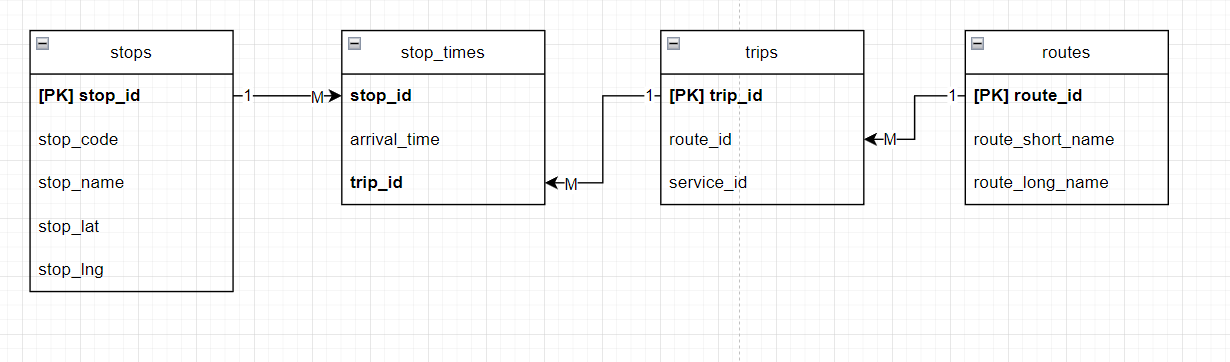

In [28]:
# Cleanup memory
del stop_times
del stops
del routes
del trips

del route_ids
del stop_ids

## 2. Joining file contents


In [2]:
import pandas as pd

In [3]:
routes = pd.read_csv('routes.txt')
trips = pd.read_csv('trips.txt')
stops = pd.read_csv('stops.txt')
stop_times = pd.read_csv('stop_times.txt')

In [3]:
data = routes.merge(trips, on="route_id")
data

,route_id,route_short_name,route_long_name,trip_id,trip_headsign
0,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates
1,10232,256,Whitby Estate/Park Royal/Spuraway,14313435,256 21st To Whitby Estates
2,10232,256,Whitby Estate/Park Royal/Spuraway,14313436,256 21st To Whitby Estates
3,10232,256,Whitby Estate/Park Royal/Spuraway,14313437,256 21st To Whitby Estates
4,10232,256,Whitby Estate/Park Royal/Spuraway,14313438,256 21st To Whitby Estates
...,...,...,...,...,...
55184,9745,418,Kingswood/22nd St Station,14043755,418 Kingswood
55185,9745,418,Kingswood/22nd St Station,14043756,418 Kingswood
55186,9745,418,Kingswood/22nd St Station,14043757,418 Kingswood
55187,9745,418,Kingswood/22nd St Station,14043758,418 Kingswood


In [4]:
data = data.merge(stop_times, on='trip_id')
data

,route_id,route_short_name,route_long_name,trip_id,trip_headsign,stop_id,arrival_time
0,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates,11867,7:05:00
1,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates,4664,7:25:19
2,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates,4665,7:26:00
3,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates,4666,7:26:30
4,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates,4667,7:26:53
...,...,...,...,...,...,...,...
1690274,9745,418,Kingswood/22nd St Station,14124135,418 Kingswood,2393,16:18:12
1690275,9745,418,Kingswood/22nd St Station,14124135,418 Kingswood,6985,16:18:39
1690276,9745,418,Kingswood/22nd St Station,14124135,418 Kingswood,11520,16:19:42
1690277,9745,418,Kingswood/22nd St Station,14124135,418 Kingswood,6987,16:20:22


In [5]:
data = data.merge(stops, on='stop_id')
data

,route_id,route_short_name,route_long_name,trip_id,trip_headsign,stop_id,arrival_time,stop_code,stop_name,stop_lat,stop_lon
0,10232,256,Whitby Estate/Park Royal/Spuraway,14313434,256 21st To Whitby Estates,11867,7:05:00,61782,Park Royal @ Bay 4,49.326832,-123.138645
1,10232,256,Whitby Estate/Park Royal/Spuraway,14313435,256 21st To Whitby Estates,11867,8:05:00,61782,Park Royal @ Bay 4,49.326832,-123.138645
2,10232,256,Whitby Estate/Park Royal/Spuraway,14313436,256 21st To Whitby Estates,11867,9:05:00,61782,Park Royal @ Bay 4,49.326832,-123.138645
3,10232,256,Whitby Estate/Park Royal/Spuraway,14313437,256 21st To Whitby Estates,11867,10:05:00,61782,Park Royal @ Bay 4,49.326832,-123.138645
4,10232,256,Whitby Estate/Park Royal/Spuraway,14313438,256 21st To Whitby Estates,11867,11:05:00,61782,Park Royal @ Bay 4,49.326832,-123.138645
...,...,...,...,...,...,...,...,...,...,...,...
1690274,9745,418,Kingswood/22nd St Station,14043754,418 Kingswood,12076,17:28:59,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118
1690275,9745,418,Kingswood/22nd St Station,14043755,418 Kingswood,12076,18:30:25,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118
1690276,9745,418,Kingswood/22nd St Station,14043756,418 Kingswood,12076,6:45:42,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118
1690277,9745,418,Kingswood/22nd St Station,14043757,418 Kingswood,12076,7:45:25,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118


In [6]:
data = data[['stop_id','stop_code','stop_name','stop_lat','stop_lon','route_id','route_short_name','route_long_name','trip_headsign']]

In [7]:
data

,stop_id,stop_code,stop_name,stop_lat,stop_lon,route_id,route_short_name,route_long_name,trip_headsign
0,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
1,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
2,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
3,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
4,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
...,...,...,...,...,...,...,...,...,...
1690274,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745,418,Kingswood/22nd St Station,418 Kingswood
1690275,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745,418,Kingswood/22nd St Station,418 Kingswood
1690276,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745,418,Kingswood/22nd St Station,418 Kingswood
1690277,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745,418,Kingswood/22nd St Station,418 Kingswood


In [ ]:
# Before cleaning the strings for whitespace
data.drop_duplicates()

,stop_id,stop_code,stop_name,stop_lat,stop_lon,route_id,route_short_name,route_long_name,trip_headsign
0,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
44,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,6691,254,British Properties/Park Royal/Van,254 British Properties
96,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
140,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,6635,044,UBC/Downtown,44 Dundarave Express
143,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,6687,250,Horseshoe Bay/Dundarave/Vancouver,250 West Bay
...,...,...,...,...,...,...,...,...,...
1690164,10781,60842,Westbound Blundell Rd @ 18300 Block,49.159552,-123.018922,9745,418,Kingswood/22nd St Station,418 Kingswood
1690193,12614,60306,Westbound Blundell Rd @ No. 8 Rd,49.158564,-123.023340,9745,418,Kingswood/22nd St Station,418 Kingswood
1690222,12613,60300,Westbound Blundell Rd @ York Rd,49.155357,-123.039740,9745,418,Kingswood/22nd St Station,418 Kingswood
1690251,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745,418,Kingswood/22nd St Station,418 Kingswood


In [ ]:
# trim potential leading and trailing whitespace from strings 
# only took me an hour to figure that one out

data['stop_name'] = data['stop_name'].apply(lambda x: x.strip())
data['route_short_name'] = data['route_short_name'].apply(lambda x: x.strip())
data['route_long_name'] = data['route_long_name'].apply(lambda x: x.strip())
data['trip_headsign'] = data['trip_headsign'].apply(lambda x: x.strip())


In [13]:
data = data.drop_duplicates()

In [19]:
data

,stop_id,stop_code,stop_name,stop_lat,stop_lon,route_id,route_short_name,route_long_name,trip_headsign
0,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
44,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,6691,254,British Properties/Park Royal/Van,254 British Properties
96,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,10232,256,Whitby Estate/Park Royal/Spuraway,256 21st To Whitby Estates
140,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,6635,044,UBC/Downtown,44 Dundarave Express
143,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,6687,250,Horseshoe Bay/Dundarave/Vancouver,250 West Bay
...,...,...,...,...,...,...,...,...,...
1690164,10781,60842,Westbound Blundell Rd @ 18300 Block,49.159552,-123.018922,9745,418,Kingswood/22nd St Station,418 Kingswood
1690193,12614,60306,Westbound Blundell Rd @ No. 8 Rd,49.158564,-123.023340,9745,418,Kingswood/22nd St Station,418 Kingswood
1690222,12613,60300,Westbound Blundell Rd @ York Rd,49.155357,-123.039740,9745,418,Kingswood/22nd St Station,418 Kingswood
1690251,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745,418,Kingswood/22nd St Station,418 Kingswood


In [36]:
# output two files, stops and routes

stops = data[['stop_id', 'stop_code', 'stop_name', 'stop_lat', 'stop_lon', 'route_id']]
routes = data[['route_id', 'route_short_name', 'route_long_name', 'trip_headsign']]

In [41]:
stops

,stop_id,stop_code,stop_name,stop_lat,stop_lon,route_id
0,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,10232
44,11867,61782,Park Royal @ Bay 4,49.326832,-123.138645,6691
96,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,10232
140,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,6635
143,4664,54612,Westbound Marine Dr @ 15 St,49.328461,-123.157136,6687
...,...,...,...,...,...,...
1690164,10781,60842,Westbound Blundell Rd @ 18300 Block,49.159552,-123.018922,9745
1690193,12614,60306,Westbound Blundell Rd @ No. 8 Rd,49.158564,-123.023340,9745
1690222,12613,60300,Westbound Blundell Rd @ York Rd,49.155357,-123.039740,9745
1690251,12076,59552,Westbound Boyd St @ Gifford St,49.184961,-122.953118,9745


In [42]:
stops = stops.drop_duplicates()
stops = stops.groupby(['stop_id','stop_code','stop_name','stop_lat','stop_lon'], as_index=False).agg({'route_id': list})
stops


,stop_id,stop_code,stop_name,stop_lat,stop_lon,route_id
0,1,50001,Westbound Davie St @ Bidwell St,49.286458,-123.140424,[30055]
1,11,50011,Eastbound Davie St @ Howe St,49.277550,-123.126971,[6616]
2,14,50014,Eastbound Pacific Blvd @ Homer St,49.272929,-123.125546,[30055]
3,21,50021,Eastbound E Pender St @ Carrall St,49.280394,-123.103799,"[6624, 6626, 6834]"
4,22,50022,Northbound Columbia St @ E Pender St,49.280772,-123.102196,[6637]
...,...,...,...,...,...,...
8589,13031,60660,Westbound W King Edward Ave @ Quesnel Dr,49.250158,-123.172648,[6627]
8590,13032,61991,Southbound Oak St @ W 70 Ave,49.207837,-123.130427,[6623]
8591,13034,61994,Westbound Smith @ Fairview,49.260258,-122.883136,[6665]
8592,13035,61993,Eastbound Smith @ Fairview,49.260142,-122.882556,[6665]


In [ ]:
stops.to_csv('stops_merged.txt', index=False)

In [50]:
stops.to_json("stops.json", orient='records', indent=2)

In [ ]:
routes = routes.drop_duplicates()
routes_headsign = routes.groupby(['route_id','route_short_name','route_long_name'], as_index=False).agg({'trip_headsign': list})
routes_headsign

,route_id,route_short_name,route_long_name,trip_headsign
0,6612,002,Macdonald/Burrard Station,"[2 Macdonald/To 16th Avenue, 2 Macdonald/To Bu..."
1,6613,003,Main/Waterfront Station,"[3 Main/To Marine Dr Station, 3 Main/To Waterf..."
2,6614,004,Powell/Downtown/UBC,"[4 Powell, 4 Downtown, 4 UBC, 4 To Blanca]"
3,6615,005,Robson/Downtown,"[5 Downtown, 5 Robson]"
4,6616,006,Davie/Downtown,"[6 Davie, 6 Downtown]"
...,...,...,...,...
227,40855,350,White Rock Centre/Crescent Beach,"[350 Crescent Beach, 350 White Rock Centre]"
228,44845,900,Bike Bus/Bike Bus,"[900 Bike Bus/To Bridgeport Station, 900 Bike ..."
229,45596,080,Marine Dr Station/River District,"[80 Marine Dr Exp/To River District, 80 Marine..."
230,46099,102,New Westminster Station/Victoria Hill,"[102 Victoria Hill, 102 New Westminster Station]"


In [47]:
routes.to_csv('routes_merged.txt', index=False)

In [ ]:
# routes_headsign.to_json("routes.json", orient='records', indent=2)
routes.to_json("routes.json", orient='records', indent=2)

BusStops object structure

```json
{
  "id": 9952,
  "code": 59316,
  "name": "Production Station @ Bay 3",
  "location": {
    "lat": 49.254032,
    "lon": -122.918229
  },
  "routes": [
    {
      "id": 6654, // Route id
      "shortName": "136",
      "longName": "Lougheed Station/Brentwood Station",
      "trip_headsign": "136 Brentwood Station", // required to show user direction of travel
    },
    {
      "id": 6646,
      "shortName": "110",
      "longName": "Lougheed Station/Metrotown Station",
      "trip_headsign": "110 Lougheed Station",
    }
  ]
}
```

# 3. Renaming Columns

To match project datamodel

In [1]:
import pandas as pd

In [2]:
# renaming columns here
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops_merged.txt')

In [7]:
routes = routes.rename(columns={'route_id':'id', 'route_short_name':'shortName', 'route_long_name':'longName'})
routes

,id,shortName,longName
0,10232,256,Whitby Estate/Park Royal/Spuraway
1,11201,033,29th Avenue Station/UBC
2,11692,364,Langley Centre/Scottsdale
3,11693,388,22nd St Station/Carvolth Exchange
4,11696,609,South Delta Exchange/Ladner Exchange
...,...,...,...
227,7322,132,Capitol Hill/Hastings @ Gilmore
228,8286,370,Cloverdale/Willowbrook
229,8289,865,Samuel Robertson
230,8290,341,Guildford/Newton Exchange


In [9]:
stops = stops.rename(columns={'stop_id':'id', 'stop_code':'code', 'stop_name':'name', 'stop_lat':'lat', 'stop_lon':'lng', 'route_id':'route_ids'})
stops

,id,code,name,lat,lng,route_ids
0,1,50001,Westbound Davie St @ Bidwell St,49.286458,-123.140424,[30055]
1,11,50011,Eastbound Davie St @ Howe St,49.277550,-123.126971,[6616]
2,14,50014,Eastbound Pacific Blvd @ Homer St,49.272929,-123.125546,[30055]
3,21,50021,Eastbound E Pender St @ Carrall St,49.280394,-123.103799,"[6624, 6626, 6834]"
4,22,50022,Northbound Columbia St @ E Pender St,49.280772,-123.102196,[6637]
...,...,...,...,...,...,...
8589,13031,60660,Westbound W King Edward Ave @ Quesnel Dr,49.250158,-123.172648,[6627]
8590,13032,61991,Southbound Oak St @ W 70 Ave,49.207837,-123.130427,[6623]
8591,13034,61994,Westbound Smith @ Fairview,49.260258,-122.883136,[6665]
8592,13035,61993,Eastbound Smith @ Fairview,49.260142,-122.882556,[6665]


In [10]:
routes.to_json("routes.json", orient='records', indent=2)
stops.to_json("stops.json", orient='records', indent=2)